Name: Berkay Doruk

Album Number: 409437

Lab: 2

# Introduction - Mathematical Model
This part explains the diffusion equation from Lecture 1, slide 13. It shows how a pollutant or chemical spreads over time and space. The original equation is below:

$$  
\frac{\partial C}{\partial t} + U \frac{\partial C}{\partial x} - D^{D} \frac{\partial^{2} C}{\partial x^{2}} = 0  
$$  

At this point we need to simplify form of the equation and it next version is below:

$$
\frac{\partial c}{\partial t} = D \frac{\partial^2 c}{\partial x^2}
$$

The amount of a substance, $c(x,t)$, depends on both time and position, and it is measured in $\mathrm{mol/m^3}$. This tells us how much of the substance is given in a certain volume.

The diffusion coefficient $D$, measured in $\mathrm{m^2/s}$, tells how fast the substance spreads over time.

If on $t = 0$, the mass $M$ is located at x = 0, the concentration changes into a Gaussian distribution over time, showed by the equation below:

$$
c(x, t) = \frac{M}{\sqrt{4 \pi D t}} \exp\left(-\frac{x^2}{4 D t}\right)
$$
 
This equation shows that as time increases, the peak of the Gaussian curve lowers and gets wider, while the total mass is staying constant.

# Importing Libraries and Defining Parameters as Varaibles

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pint

si = pint.UnitRegistry()
Q = si.Quantity

The following parameters were chosen:

- **Diffusion Coefficient ($D$)**: $0.5 \, \mathrm{m^2/s}$  
**Total Mass ($M$)**: Adjusted to $\sqrt{4 \pi}$ moles so that the peak value at $t = 1 \, \mathrm{s}$ equals $1.0 \, \mathrm{mol/m^3}$
- **Positions**: 4 positions where the concentration will be shown: $0 , \mathrm{m}$, $1 , \mathrm{m}$, $2 , \mathrm{m}$ and $3 \mathrm{m}$.
- **Time Range ($t$)**: From $0.1 \, \mathrm{s}$ to $5 \, \mathrm{s}$

**Explaniation for times:**

First of all when time is 0 the equation becomes undefined. That is the resason why time starts
from “0.1”. And the reason times limit set between 0.1s and 5s is it will allow us to see changes
at the beginning. The limit of 5 second could be enough for it.

In [26]:
# Diffusion coefficient and mass
D = Q(0.5, 'm^2/s')  
M = Q(np.sqrt(4 * np.pi), 'mol/m^2')

positions = Q([0, 1, 2, 3], 'm')  # Focused near origin

# Time (avoids division by zero at t=0)
t = Q(np.linspace(0.1, 5, 500), 's')

# Analytic Solution Function

The Gaussian solution of the diffusion equation is defined here:

$$
c(x, t) = \frac{M}{\sqrt{4 \pi D t}} \exp\left(-\frac{x^2}{4 D t}\right)
$$

We will use the **Pint** library to manage units correctly.

In [27]:
def concentration(x: pint.Quantity, t: pint.Quantity) -> pint.Quantity:
    """
    Calculate c(x,t) with unit handling.
    """
    denominator = np.sqrt(4 * np.pi * D * t)
    exponent = -(x**2) / (4 * D * t)
    
    return (M / denominator) * np.exp(exponent)

# Creation of Graph

- The concentration $ c(x,t) $ is calculated for a fixed position and times (from 0.1 s to 5 s).  
- Curves are plotted for several fixed positions (0m, 1m, 2m and 3m).  
- The x‑axis represents time (with units automatically added using **Pint**) and the y‑axis represents concentration.  

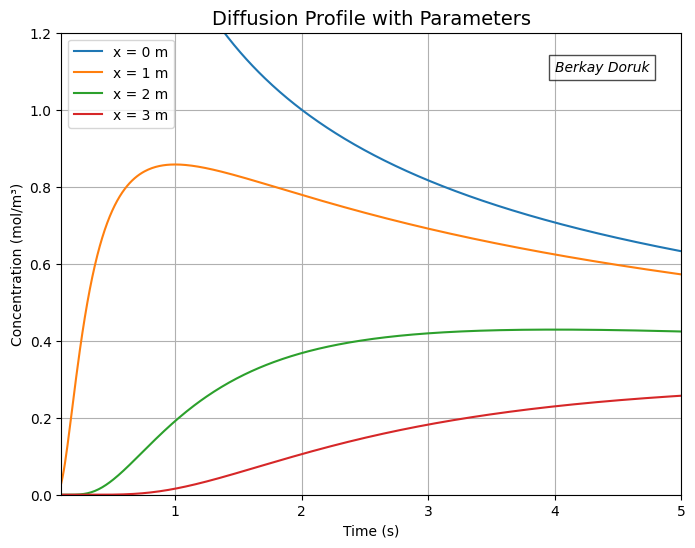

<Figure size 640x480 with 0 Axes>

In [29]:
plt.figure(figsize=(8, 6))

# Plot concentration vs time for each position
for x in positions:
    c = concentration(x, t).to('mol/m^3')
    plt.plot(t.magnitude, c.magnitude, label=f'x = {x:~P}')

plt.xlabel(f'Time ({t.units:~P})')
plt.ylabel(f'Concentration ({c.units:~P})')
plt.xlim(t[0].magnitude, t[-1].magnitude)
plt.ylim(0, 1.2)  

plt.title("Diffusion Profile with Parameters", fontsize=14)
plt.grid(True, alpha=1)
plt.legend()

plt.text(4, 1.1, 'Berkay Doruk', style='italic', bbox={'facecolor': 'white', 'alpha': 0.7})
plt.show()

# Save as PDF
plt.savefig('diffusion_analytic_solution.pdf', bbox_inches='tight')


# GRAPH EXPLANIATION

- The graph shows how concentration changes over time and space.

- **$x = 0 \mathrm{m}$**: The concentration is high and it is around $1.3 \, \mathrm{mol/m^3}$ and decreases as going away from the source. Also every line is getting closer to each other.

- **$x = 1, 2, 3 \mathrm{m}$**: For short times (between 1 and 2 seconds), the concentration rises while the diffusion wave reaches these points. Each position has a different peak point, showing that the wave takes longer to reach longer distances.

# CONCLUSION

This Jupyter Notebook shows the classical gaussian solution to the one-dimensional diffusion equation using units with the Pint library and graph showing with Matplotlib. In the codes, the x‑axis represents time (from 0s to 5s), and concentration on $c(x,t)$ are plotted for different positions (0m, 1m, 2m, 3m).